# BirdCLEF_2022_EDA🦜🐦🎶

# Let's make the best way and protect the endangered Hawaiian birds.

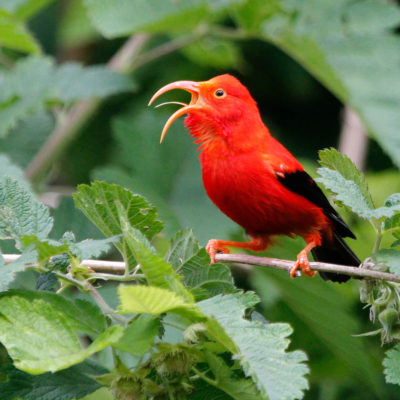
* 'I'IWI[ Image photo by :Sherman Wing "Hawai'i Birding Trails"](https://hawaiibirdingtrails.hawaii.gov/bird/)


# What kind of birds are in Hawaii? 

* These birds are only found in Hawaii.
* [APAPANE](http:/https://hawaiibirdingtrails.hawaii.gov/bird/apapane/)
* [HAWAII ELEPAIO](https://hawaiibirdingtrails.hawaii.gov/bird/hawaii-elepaio/)
* [HAWAII AMAKIHI](https://hawaiibirdingtrails.hawaii.gov/bird/hawaii-amakihi/)
* ['I'IWI](https://hawaiibirdingtrails.hawaii.gov/bird/iiwi/)


* These Hawaiian birds are endangered.
* [HAWAII AKEPA ](https://hawaiibirdingtrails.hawaii.gov/bird/hawaii-akepa/)
* [AKIAPOLAAU](https://hawaiibirdingtrails.hawaii.gov/bird/akiapolaau/)
* [ʻĀKOHEKOHE](https://hawaiibirdingtrails.hawaii.gov/bird/akohekohe/)
* [HAWAII CREEPER](https://hawaiibirdingtrails.hawaii.gov/bird/hawaii-creeper/)
* [HAWAIIAN GOOSE/ NĒNĒ](https://hawaiibirdingtrails.hawaii.gov/bird/hawaiian-goose/)
* [MAUI PARROTBILL](https://hawaiibirdingtrails.hawaii.gov/bird/maui-parrotbill/)
* [ʻŌMAʻO](https://hawaiibirdingtrails.hawaii.gov/bird/omao/)
* [PALILA](https://hawaiibirdingtrails.hawaii.gov/bird/palila/)


* Please see below for onther birds information
* [eBird:TheCoenellLabofOmithology](https://ebird.org/home/)
* [xeno-canto](https://xeno-canto.org/)
* [Hawai'i Birding Trails](https://hawaiibirdingtrails.hawaii.gov/bird/)
* [List of birds of Hawaii: wiki](https://en.wikipedia.org/wiki/List_of_birds_of_Hawaii/)


In [ ]:
!pip install '../input/noisereduce-2-0-0/noisereduce-2.0.0-py3-none-any.whl'

In [ ]:
pip install wordcloud

In [ ]:
import os
import re
import ast
import json
import random
import numpy as np
import pandas as pd
import soundfile as sf
import geopandas as gpd
import noisereduce as nr
from datetime import datetime, timedelta

from wordcloud import WordCloud
#from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
sns.set('notebook','darkgrid', 'rainbow')

%matplotlib inline

import librosa
import librosa.display

import IPython.display as display
from IPython.display import Image
from IPython.display import Audio
import IPython.display as ipd

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

from itertools import cycle
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

import plotly.express as px
from scipy.fft import fft, fftfreq

path = '/kaggle/input/birdclef-2022/'
os.listdir(path)

In [ ]:
path_ex = '/kaggle/input/'
os.listdir(path_ex)

In [ ]:
train = pd.read_csv(path+'train_metadata.csv')
test = pd.read_csv(path+'test.csv')
ebird = pd.read_csv(path+'eBird_Taxonomy_v2021.csv')
sub = pd.read_csv(path+'sample_submission.csv')

train_ex_am = pd.read_csv(path_ex +'xeno-canto-bird-recordings-extended-a-m/train_extended.csv')
train_ex_nz = pd.read_csv(path_ex +'xeno-canto-bird-recordings-extended-n-z/train_extended.csv')

BASE_DIR = '../input/birdclef-2022/'
DATA_DIR ='../input/birdclef-2022/train_audio'

with open(path+'scored_birds.json') as f:
    scored_birds = json.load(f)

===================================
# Test Soundscapes


In [ ]:
os.listdir(path+'test_soundscapes')

==================================
# Train Data(metadata)

In [ ]:
train.head(3)

In [ ]:
train.info()

In [ ]:
train.iloc[0]

> train data is non_null and Dtype is object and float64.

==================================
# Test Data

In [ ]:
test.head(3)

In [ ]:
test.info()

> test data is non_null and Dtype is object and int64.

==================================
# xeno-canto-bird_recoding_extend

In [ ]:
train_ex = pd.concat([train_ex_am ,train_ex_nz])

In [ ]:
train_ex.head(3)

In [ ]:
train_ex.info()

In [ ]:
train_ex.species.describe()

In [ ]:
train_ex.drop('xc_id', axis=1, inplace = True)

In [ ]:
fig, ax = plt.subplots(figsize =(24, 10))
g = sns.countplot(data = train_ex[:5000], x = "ebird_code")

plt.title("Species")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize =(24, 10))
g = sns.countplot(data = train_ex[5000:10000], x = "ebird_code")

plt.title("Species")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_ex.elevation.describe()

In [ ]:
fig, ax = plt.subplots(figsize =(24, 10))
g = sns.countplot(data = train_ex[:1000], x = "elevation")

plt.title("Elevation")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.xticks(rotation=90)   
plt.show()

In [ ]:
train_ex['rating']

In [ ]:
fig, ax = plt.subplots(figsize =(10, 6))
g = sns.countplot(data = train_ex, x = "rating")

plt.title("Ratimg")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [ ]:
train_ex.groupby('rating').mean().astype(int).T.style.bar( align = 'mid', width = 90, axis = None, color = ['#d65f5f','#5fba7d'])

In [ ]:
fig, ax = plt.subplots(figsize =(10, 6))
g = sns.countplot(data = train_ex, x = "sampling_rate")

plt.title("Sampling_rate")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)     
plt.show()

In [ ]:
train_ex.groupby('sampling_rate').mean().astype(int).style.bar( align = 'mid', width = 90, axis = None, color = ['#d65f5f','#5fba7d'])

In [ ]:
fig, ax = plt.subplots(figsize =(10, 6))
g = sns.countplot(data = train_ex, x = "bird_seen")

plt.title("Bird_seen")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [ ]:
train_ex.to_csv("train_ex.csv")  

* I added these data. I will try to using this data.

==================================
# scored_birds (scored_birds.json)

In [ ]:
train_p = train[train['primary_label'].isin(scored_birds)]
train_p.head(3)

In [ ]:
scored_birds = train_p["primary_label"].unique()
print(len(scored_birds))
scored_birds

In [ ]:
fig, ax = plt.subplots(figsize =(10, 6))
g = sns.countplot(data = train_p, x = "rating")

plt.title("Rating")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

[](http://)

===================================
# eBird(eBird_Taxonomy_v2021)
* [2021 eBird Taxonomy Update — COMPLETE](https://ebird.org/news/2021-ebird-taxonomy-update/)
* [eBird_Taxonomy:Help Center](https://support.ebird.org/en/support/solutions/articles/48000837816-the-ebird-taxonomy/)

In [ ]:
ebird.head(3)

In [ ]:
ebird.info()

In [ ]:
sns.set('notebook','darkgrid', 'rainbow')
fig, ax = plt.subplots(figsize =(10, 6))
g = sns.countplot(data = ebird, x = "CATEGORY")

plt.title("Record count per Category")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

* [@PRAVEEN KUMAR/🐦 BirdCLEF 2022: EDA 🐦](https://www.kaggle.com/prokaggler/birdclef-2022-eda/)


==================================
# Train audio🎧

In [ ]:
print('Number of train_audio/species:', len(os.listdir(path+'train_audio')))
print("Example")
fn = train["filename"].values[1]
ipd.Audio(f"{BASE_DIR}train_audio/{fn}")

😌🎵

==================================
# Primary_label & Common_name🦆

In [ ]:
birds_name = pd.DataFrame( train[['common_name','primary_label']])
print(len(birds_name))
birds_name

In [ ]:
#n = 0
#for i in range(6):
    #print(birds_name.value_counts()[n: n+30])
    #n += 30  

In [ ]:
fig, ax = plt.subplots(figsize=(16, 28))

sns.countplot(data=train, y = 'primary_label', ax=ax, order=train['primary_label'].value_counts().index,)
sns.countplot(data=train_p, y = 'primary_label', ax=ax, order=train['primary_label'].value_counts().index, color = 'red')
plt.title('Birds count: Red line is scored_birds',fontdict = {'fontsize':18})
plt.legend()
plt.show()


==================================
# When are birds singing?⌚

In [ ]:
def round_date(date, delta = 30, th = 10):
    date = date.to_pydatetime()
    x = date.minute
    if ((x >= (delta - th)) & (x < delta)) or (x > (delta + th)):
#         print('Up')
        date = date + (datetime.min - date) % timedelta(minutes = delta)
    elif ((x <= (delta+ th )) & (x > delta)) or (x < (delta - th)):
#         print('down')
        date = date - (date - datetime.min) % timedelta(minutes = delta)

    
    return date.time().strftime("%H:%M")

train['time_tf']  = pd.to_datetime(train['time'], errors = 'coerce').dropna().apply(lambda x:round_date(x))
train.dropna(subset=['time_tf'], inplace = True)

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'time_tf', data = train.sort_values(by = 'time_tf'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontdict = {'fontsize':18})
plt.ylabel('Frequency', fontdict = {'fontsize':18})
plt.title('Birds Registers\' Time',fontdict = {'fontsize':18})
plt.tight_layout()

* It must be an owl at night🦉 hoot!
* Which is tne early bird?🐓

* [@PAULO JUNQUEIRA/🐥 Little Bird, what sound is that? - EDA](https://www.kaggle.com/paulojunqueira/little-bird-what-sound-is-that-eda)


==================================
# Secondary_label

In [ ]:
train['secondary_labels'].head(3)

In [ ]:
labels = []
for row in train.index:
    labels.extend(ast.literal_eval(train.loc[row, 'secondary_labels']))
labels = list(set(labels))

print('Number of unique bird labels:', len(labels))


In [ ]:
train['secondary_labels'] = train['secondary_labels'].apply(lambda x: re.findall(r"'(\w+)'", x))

In [ ]:
data_1 = train['secondary_labels'].explode().value_counts().head(50).reset_index()

In [ ]:

fig, ax = plt.subplots( figsize = (10,8))
sns.barplot(y = 'index', x = 'secondary_labels',data = data_1[1:],ax = ax)
ax.set_title(" Birds Found on Background as Noise", fontdict = {'fontsize':20})
ax.set_xlabel('Frequency', fontdict = {'fontsize':16})
ax.set_ylabel('Birds Common Name', fontdict = {'fontsize':16})

plt.tight_layout()
plt.show()

* Do we need to remove the noise?How?--> using noise reduction
* [@PAULO JUNQUEIRA/🐥 Little Bird, what sound is that? - EDA](https://www.kaggle.com/paulojunqueira/little-bird-what-sound-is-that-eda)

In [ ]:
text = " ".join(i for i in train_ex['ebird_code'])
word_cloud = WordCloud(width=1600, height=800, collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=[14, 8])
plt.imshow(word_cloud)
plt.axis("off")
plt.title("ebird_code")
plt.show()

In [ ]:
text = " ".join(i for i in train['primary_label'])
word_cloud = WordCloud(width=1600, height=800, collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=[14, 8])
plt.imshow(word_cloud)
plt.axis("off")
plt.title("Primary_label")
plt.show()

In [ ]:
text = " ".join(i for i in scored_birds)
word_cloud = WordCloud(width=1600, height=800, collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=[14, 8])
plt.imshow(word_cloud)
plt.axis("off")
plt.title("scored_birds")
plt.show()

* There are many different birds in the eBird and Xeno,so I will focus on Hawaiian birds.

==================================
# Bird distribution map🔍

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(26,20))
# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)

# plot points
cmap = plt.cm.get_cmap('jet')
birds = len(train["primary_label"].unique())
for i, (bird, dfg) in enumerate(train.groupby("primary_label")):
    dfg.longitude = np.around(dfg.longitude, 1)
    dfg.latitude = np.around(dfg.latitude, 1)
    dfgg = dfg.groupby(["longitude", "latitude"]).size().reset_index(name="counts")
    dfgg.plot(x="longitude", y="latitude", kind="scatter", c=cmap(float(i) / birds), s=dfgg["counts"] * 5, ax=ax, label=bird, alpha=0.5)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=15, fancybox=True, shadow=True)

# get axes limits
x_lo, x_up = ax.get_xlim()
y_lo, y_up = ax.get_ylim()
# add minor ticks with a specified sapcing (deg)
deg = 5
# add grid
ax.set_xticks(np.arange(np.ceil(x_lo), np.ceil(x_up), deg), minor=True)
ax.set_yticks(np.arange(np.ceil(y_lo), np.ceil(y_up), deg), minor=True)
ax.grid(b=True, which="minor", alpha=0.25)

* [@JIRKA BOROVEC/🦜BirdCLEF: world🌎map with birds](https://www.kaggle.com/jirkaborovec/birdclef-world-map-with-birds/)

==================================
* I try plotly ,however this data that Skylark is not in Hawaii.

In [ ]:
fig = px.scatter_geo(
    train[train['primary_label'] == 'skylar'],
    lat="latitude",
    lon="longitude",
    color="primary_label",
    width=1000,
    height=500,
    title="Skylak Distribution",
)
fig.show()

==================================
# Folium🗺

In [ ]:
# folium
birdmap = folium.Map(
    location = [19.629425,-155.361479], #  It's in Hawaii.
    titles = 'BirdMap',
    zoom_start = 7 
) 


In [ ]:
for row in train_p.iterrows():
    #base values
    row_values = row[1] #this gets the 
    soundsrc = str(row_values['url']) + '/embed?simple=1' #this is the string part of the embed code...
   
    locations = [row_values['latitude'], row_values['longitude']]
    
    popup = '</iframe>' \
            f'<strong>  {row_values["common_name"]}  </strong> \
            <br><br> \
            <strong> Location: </strong> {locations}  \
            <br><br> \
            <strong> Rating: </strong> {row_values["rating"]} \
            <br><br> \
            This is a: <strong> {row_values["primary_label"]} </strong>... Listen to it below. \
            <br><br> \
            <iframe src={soundsrc} scrolling="no" frameborder="0" width="340" height="115"></iframe>' \
            '</iframe>'
    marker = folium.Marker(location=locations, popup = popup) #defines the marker
    marker.add_to(birdmap) #adds the marker to the map
    
birdmap

This is it! I wanted to..
*  [@ALEXIS COOK/Kaggle's courses /Geospatial Analysis 3/Interactive Maps](https://www.kaggle.com/alexisbcook/interactive-maps)
* [@ALEX TEBOUL/Tutorial: BirdCLEF Visualizations with Plotly](https://www.kaggle.com/alexteboul/tutorial-birdclef-visualizations-with-plotly/)
* [@ALEX TEBOUL/Tutorial: Play Bird Audio on Map with Folium](https://www.kaggle.com/alexteboul/tutorial-play-bird-audio-on-map-with-folium)

===================================
# Audio▶

In [ ]:
y, sr = librosa.load(f"{BASE_DIR}train_audio/{fn}")
print(f"Numpy array of the audio loaded of shape {y.shape} and sample rate {sr}")

In [ ]:
class configuraion():
    '''Configuration File'''
    n_fft = 2048
    hop_length = n_fft // 4
    
    n_show_birds = 7
    
CFG = configuraion()

In [ ]:
df = train_p['primary_label'].value_counts().index
df

In [ ]:

for i in df[:CFG.n_show_birds]:
    print(i)
    
    path = train[train['primary_label'] == i].sample(1,random_state = 2022)['filename'].values[0]
    path ='/kaggle/input/birdclef-2022/train_audio/' + path
    
    data, sample_rate = librosa.load(path)
    
    stft = librosa.stft(data, n_fft=CFG.n_fft, hop_length=CFG.hop_length)
    spectrogram = np.abs(stft)
    x = librosa.amplitude_to_db(spectrogram)
    
    
    fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (18,5))
    
    librosa.display.specshow(x, sr=sample_rate, hop_length=CFG.hop_length,ax = ax[0])
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Frequency")
    ax[0].set_title("Spectrogram")
    
    librosa.display.waveshow(data,ax = ax[1])
    plt.show()

Well, I don't know what to do next?
* [@PAULO JUNQUEIRA/🐥 Little Bird, what sound is that? - EDA](https://www.kaggle.com/paulojunqueira/little-bird-what-sound-is-that-eda)

===================================
# Noise reduction


In [ ]:
test_soundscape = '../input/birdclef-2022/test_soundscapes/soundscape_453028782.ogg'
y, sr = librosa.load(test_soundscape, sr=32000, offset=None)
Audio(test_soundscape)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=np.arange(len(y)), y=y, ax=ax);

In [ ]:
reduced_noise = nr.reduce_noise(y=y, sr=32000)
Audio(reduced_noise, rate=32000)

In [ ]:
y = reduced_noise

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=np.arange(len(y)), y=y, ax=ax)


* I will try spci.fft( Fast Fourier transform(FFT)) next time.
* [@ZOLTAN KUCSIK//noisereduce package - Without Internet connection](https://www.kaggle.com/kucsikz/noisereduce-package-without-internet-connection/)

===================================
# Submission

In [ ]:
test_audio_dir = '../input/birdclef-2022/test_soundscapes/'
file_list = [f.split('.')[0] for f in sorted(os.listdir(test_audio_dir))]

In [ ]:
#with open('../input/birdclef-2022/scored_birds.json') as sbfile:
    #scored_birds = json.load(sbfile)

In [ ]:
pred = {'row_id': [], 'target': []}

for afile in file_list:
    
    path = test_audio_dir + afile + '.ogg'
    chunks = [[] for i in range(12)]
    
    for i in range(len(chunks)):        
        chunk_end_time = (i + 1) * 5
        for bird in scored_birds: # 21 Birds
            
            score = np.random.uniform()
            
            row_id = afile + '_' + bird + '_' + str(chunk_end_time)
            
            pred['row_id'].append(row_id)
            pred['target'].append(True if score > 0.012 else False)

In [ ]:
results = pd.DataFrame(pred, columns = ['row_id', 'target'])
results.to_csv("submission.csv", index=False)    


In [ ]:
print(results.head(50)) 
print(results.tail(50))   

* This is the results before saving version_13. Why are the results displayed differently befor and after saving? I think that it could be a confusion.
*                             row_id  target
* 0     soundscape_453028782_akiapo_5    True
* 1     soundscape_453028782_aniani_5   False
* 2     soundscape_453028782_apapan_5    True
* 3     soundscape_453028782_barpet_5    True
* 4     soundscape_453028782_crehon_5   False
* 5     soundscape_453028782_elepai_5    True
* 6     soundscape_453028782_ercfra_5   False
* 7     soundscape_453028782_hawama_5    True
* 8     soundscape_453028782_hawcre_5   False
* 9     soundscape_453028782_hawgoo_5    True
* 10    soundscape_453028782_hawhaw_5    True
* 11   soundscape_453028782_hawpet1_5    True
* 12    soundscape_453028782_houfin_5    True
* 13      soundscape_453028782_iiwi_5    True
* 14    soundscape_453028782_jabwar_5    True
* 15    soundscape_453028782_maupar_5    True
* 16      soundscape_453028782_omao_5   False
* 17    soundscape_453028782_puaioh_5   False
* 18    soundscape_453028782_skylar_5   False
* 19   soundscape_453028782_warwhe1_5    True
* 20    soundscape_453028782_yefcan_5    True
* 21   soundscape_453028782_akiapo_10    True
* 22   soundscape_453028782_aniani_10    True
* 23   soundscape_453028782_apapan_10    True
* 24   soundscape_453028782_barpet_10   False
* 25   soundscape_453028782_crehon_10   False
* 26   soundscape_453028782_elepai_10   False
* 27   soundscape_453028782_ercfra_10    True
* 28   soundscape_453028782_hawama_10    True
* 29   soundscape_453028782_hawcre_10    True
* 30   soundscape_453028782_hawgoo_10    True
* 31   soundscape_453028782_hawhaw_10    True
* 32  soundscape_453028782_hawpet1_10   False
* 33   soundscape_453028782_houfin_10   False
* 34     soundscape_453028782_iiwi_10    True
* 35   soundscape_453028782_jabwar_10    True
* 36   soundscape_453028782_maupar_10   False
* 37     soundscape_453028782_omao_10    True
* 38   soundscape_453028782_puaioh_10   False
* 39   soundscape_453028782_skylar_10   False
* 40  soundscape_453028782_warwhe1_10   False
* 41   soundscape_453028782_yefcan_10   False
* 42   soundscape_453028782_akiapo_15   False
* 43   soundscape_453028782_aniani_15    True
* 44   soundscape_453028782_apapan_15    True
* 45   soundscape_453028782_barpet_15   False
* 46   soundscape_453028782_crehon_15    True
* 47   soundscape_453028782_elepai_15   False
* 48   soundscape_453028782_ercfra_15    True
* 49   soundscape_453028782_hawama_15    True
*                               row_id  target
* 202     soundscape_453028782_iiwi_50   False
* 203   soundscape_453028782_jabwar_50   False
* 204   soundscape_453028782_maupar_50   False
* 205     soundscape_453028782_omao_50   False
* 206   soundscape_453028782_puaioh_50    True
* 207   soundscape_453028782_skylar_50    True
* 208  soundscape_453028782_warwhe1_50    True
* 209   soundscape_453028782_yefcan_50   False
* 210   soundscape_453028782_akiapo_55   False
* 211   soundscape_453028782_aniani_55    True
* 212   soundscape_453028782_apapan_55   False
* 213   soundscape_453028782_barpet_55   False
* 214   soundscape_453028782_crehon_55    True
* 215   soundscape_453028782_elepai_55   False
* 216   soundscape_453028782_ercfra_55    True
* 217   soundscape_453028782_hawama_55    True
* 218   soundscape_453028782_hawcre_55   False
* 219   soundscape_453028782_hawgoo_55    True
* 220   soundscape_453028782_hawhaw_55    True
* 221  soundscape_453028782_hawpet1_55    True
* 222   soundscape_453028782_houfin_55    True
* 223     soundscape_453028782_iiwi_55   False
* 224   soundscape_453028782_jabwar_55   False
* 225   soundscape_453028782_maupar_55   False
* 226     soundscape_453028782_omao_55    True
* 227   soundscape_453028782_puaioh_55   False
* 228   soundscape_453028782_skylar_55    True
* 229  soundscape_453028782_warwhe1_55   False
* 230   soundscape_453028782_yefcan_55    True
* 231   soundscape_453028782_akiapo_60   False
* 232   soundscape_453028782_aniani_60   False
* 233   soundscape_453028782_apapan_60   False
* 234   soundscape_453028782_barpet_60   False
* 235   soundscape_453028782_crehon_60   False
* 236   soundscape_453028782_elepai_60    True
* 237   soundscape_453028782_ercfra_60    True
* 238   soundscape_453028782_hawama_60   False
* 239   soundscape_453028782_hawcre_60   False
* 240   soundscape_453028782_hawgoo_60   False
* 241   soundscape_453028782_hawhaw_60   False
* 242  soundscape_453028782_hawpet1_60   False
* 243   soundscape_453028782_houfin_60    True
* 244     soundscape_453028782_iiwi_60    True
* 245   soundscape_453028782_jabwar_60   False
* 246   soundscape_453028782_maupar_60   False
* 247     soundscape_453028782_omao_60    True
* 248   soundscape_453028782_puaioh_60   False
* 249   soundscape_453028782_skylar_60    True
* 250  soundscape_453028782_warwhe1_60   False
* 251   soundscape_453028782_yefcan_60    True

* The results will vary each time.
* I have to improve.💪
* [@STEFAN KAHL](https://www.kaggle.com/stefankahl/how-to-submit-to-birdclef-2022/)


==================================
* It's a mish_mash, but I learned a lot of things.
* Please don't forget to upvote them! Thank you all!
> # In progress..........